# Diabetes 130-US hospitals for years 1999-2008

This data has been prepared to analyze factors related to readmission as well as other outcomes pertaining to patients with diabetes.

## Information

### Additional Information

The dataset represents 10 years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. It includes over 50 features representing patient and hospital outcomes. Information was extracted from the database for encounters that satisfied the following criteria.
(1)	It is an inpatient encounter (a hospital admission).
(2)	It is a diabetic encounter, that is, one during which any kind of diabetes was entered to the system as a diagnosis.
(3)	The length of stay was at least 1 day and at most 14 days.
(4)	Laboratory tests were performed during the encounter.
(5)	Medications were administered during the encounter.
The data contains such attributes as patient number, race, gender, age, admission type, time in hospital, medical specialty of admitting physician, number of lab test performed, HbA1c test result, diagnosis, number of medication, diabetic medications, number of outpatient, inpatient, and emergency visits in the year before the hospitalization, etc.
Detailed description of all the atrributes is provided in Table 1 Beata Strack, Jonathan P. DeShazo, Chris Gennings,  Juan L. Olmo, Sebastian Ventura,  Krzysztof J. Cios, and John N. Clore, “Impact of HbA1c Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Records,” BioMed Research International, vol. 2014, Article ID 781670, 11 pages, 2014.

http://www.hindawi.com/journals/bmri/2014/781670/

### Dataset

Our dataset is: Diabetes 130-US hospitals for years 1999-2008 Data Set.

Source: https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-800

The dataset represents 10 years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. It includes over 50 features representing patient and hospital outcomes.

The target labels, indicating:

- “<30” if the patient was readmitted in less than 30 days
- “>30” if the patient was readmitted in more than 30 days
- “No” for no record of readmission.

This problem is a 3-class classification problem.

### Citation Requests/Acknowledgements

Beata Strack, Jonathan P. DeShazo, Chris Gennings, Juan L. Olmo, Sebastian Ventura, Krzysztof J. Cios, and John N. Clore, “Impact of HbA1c Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Records,” BioMed Research International, vol. 2014, Article ID 781670, 11 pages, 2014.

# Importing dataset, libraries and some EDA

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
data = pd.read_csv('diabetic_data.csv')
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [39]:
data.shape

(101766, 50)

In [40]:
columns = data.columns
print(columns)

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [42]:
data.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [43]:
data.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

In [44]:
for i in columns :
    if data[i].dtype=='object':
        print(i + ' : ')
        print(data[i].unique())

race : 
['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']
gender : 
['Female' 'Male' 'Unknown/Invalid']
age : 
['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
weight : 
['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']
payer_code : 
['?' 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM' 'CM' 'CH' 'PO' 'WC' 'OT'
 'OG' 'MP' 'FR']
medical_specialty : 
['Pediatrics-Endocrinology' '?' 'InternalMedicine'
 'Family/GeneralPractice' 'Cardiology' 'Surgery-General' 'Orthopedics'
 'Gastroenterology' 'Surgery-Cardiovascular/Thoracic' 'Nephrology'
 'Orthopedics-Reconstructive' 'Psychiatry' 'Emergency/Trauma'
 'Pulmonology' 'Surgery-Neuro' 'Obsterics&Gynecology-GynecologicOnco'
 'ObstetricsandGynecology' 'Pediatrics' 'Hematology/Oncology'
 'Otolaryngology' 'Surgery-Colon&Rectal' 'Pediatrics-CriticalCare'
 'Endocrinology' 'Urology' 'Psychiatry-Child/Adolescent'
 'Pediatrics-Pulmonology' '

In [45]:
dropColumnsML=['race','payer_code','medical_specialty']

In [46]:
print(data.gender.value_counts())

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64


We can drop the rows with 'Unknown/Invalid' value and transform Male and Female to 0 and 1.

In [47]:
data.loc[data.gender=='Male','gender'] = 0
data.loc[data.gender=='Female','gender'] = 1
indexToDrop = data[data.gender=='Unknown/Invalid'].index #Selecting indexes that correspond to 'unkown/Invalid' value of gender
data.drop(indexToDrop , inplace=True)
print(data.gender.value_counts())

1    54708
0    47055
Name: gender, dtype: int64


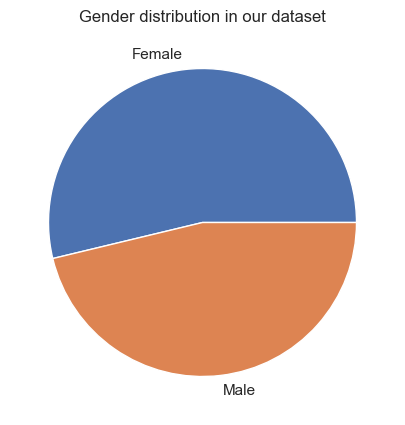

In [48]:
#Let visualize the gender values count
ax = plt.pie(data.gender.value_counts(),labels=['Female','Male'])
plt.title('Gender distribution in our dataset')
plt.show()

In [49]:
data.medical_specialty.value_counts()

?                                49947
InternalMedicine                 14635
Emergency/Trauma                  7565
Family/GeneralPractice            7440
Cardiology                        5351
                                 ...  
SportsMedicine                       1
Speech                               1
Perinatology                         1
Neurophysiology                      1
Pediatrics-InfectiousDiseases        1
Name: medical_specialty, Length: 73, dtype: int64

In [50]:
#50% of medical speciality is missing in our dataset

In [51]:
medical_specialty=data[data.medical_specialty!='?'].medical_specialty
print('?' in medical_specialty)

False


In [52]:
medical_specialty.value_counts()

InternalMedicine                    14635
Emergency/Trauma                     7565
Family/GeneralPractice               7440
Cardiology                           5351
Surgery-General                      3099
                                    ...  
Perinatology                            1
Neurophysiology                         1
Psychiatry-Addictive                    1
Pediatrics-InfectiousDiseases           1
Surgery-PlasticwithinHeadandNeck        1
Name: medical_specialty, Length: 72, dtype: int64

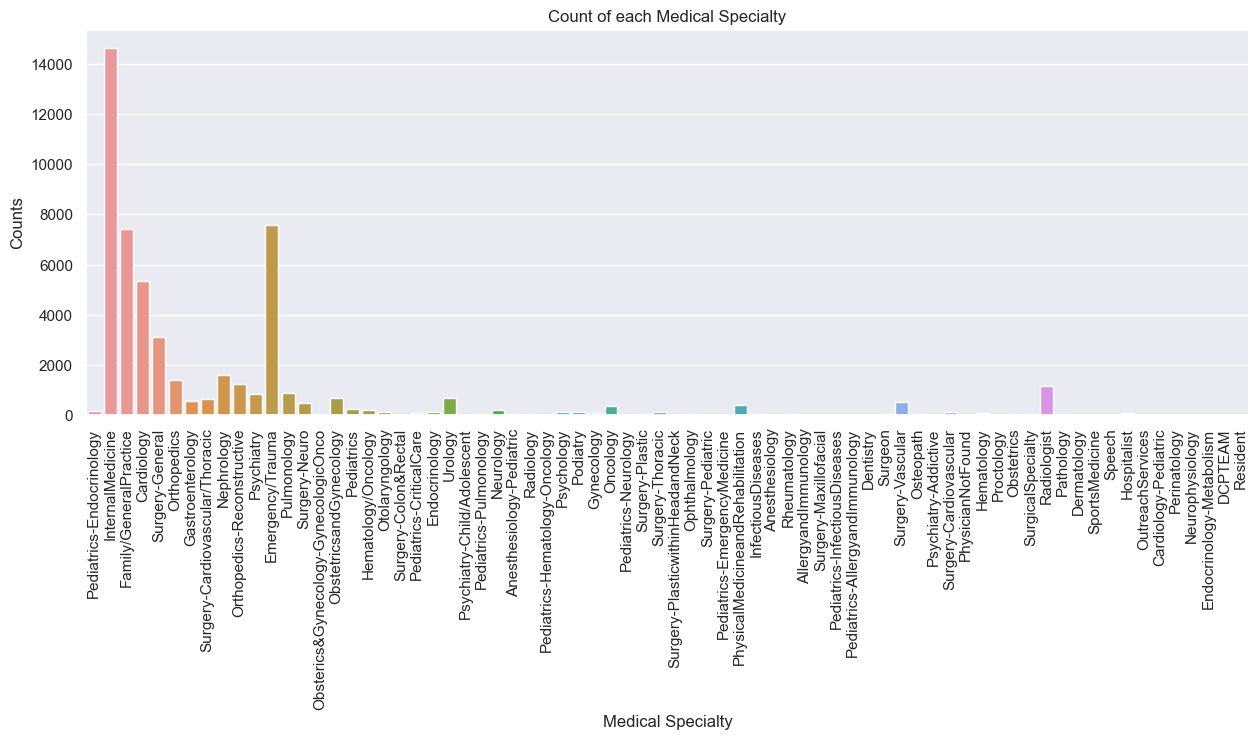

In [53]:
sns.set(rc={'figure.figsize':(15,5)})
ax = sns.countplot(x=medical_specialty)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Count of each Medical Specialty')
plt.xlabel('Medical Specialty')
plt.ylabel('Counts')
plt.show()

In [54]:
data.readmitted.value_counts()

NO     54861
>30    35545
<30    11357
Name: readmitted, dtype: int64

In [55]:
data.loc[data.readmitted == 'NO','readmitted'] = 0
data.loc[data.readmitted != 0,'readmitted'] = 1
data.readmitted = data.readmitted.astype('int')


In [56]:
data.readmitted.value_counts()

0    54861
1    46902
Name: readmitted, dtype: int64

In [57]:
replaceDict = {'[0-10)' : 5,'[10-20)' : 15,'[20-30)' : 25,'[30-40)' : 35,'[40-50)' : 45,'[50-60)' : 55,'[60-70)' : 65, '[70-80)' : 75,'[80-90)' : 85,'[90-100)' : 95}

data['age'] = data['age'].apply(lambda x : replaceDict[x])

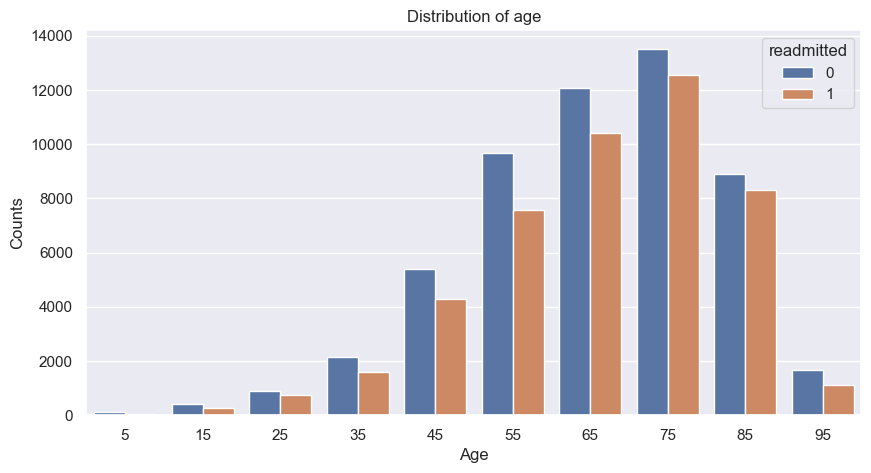

In [58]:
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.countplot(data=data,x=data.age,hue='readmitted')
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Distribution of age')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.show()

We can conclude that most of our sample study are between **45** to **95** years old

In [59]:
data.weight.value_counts()

?            98566
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64

In [60]:
#96% of weight values are missing which means we need to drop that column
dropColumnsML.append('weight')
print(dropColumnsML)

['race', 'payer_code', 'medical_specialty', 'weight']


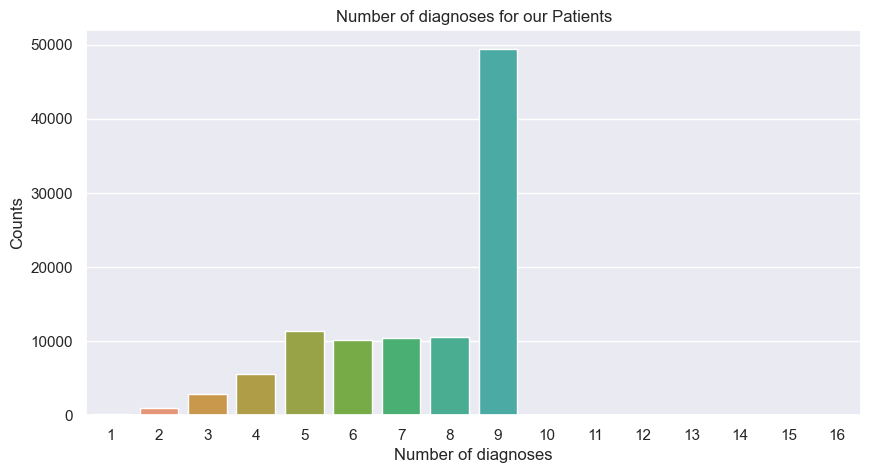

In [61]:
sns.countplot(x=data.number_diagnoses)
plt.title('Number of diagnoses for our Patients')
plt.xlabel('Number of diagnoses')
plt.ylabel('Counts')
plt.show()

We conclude that most of our patients had 4 to 9 diagnoses but none of them had more than 9.

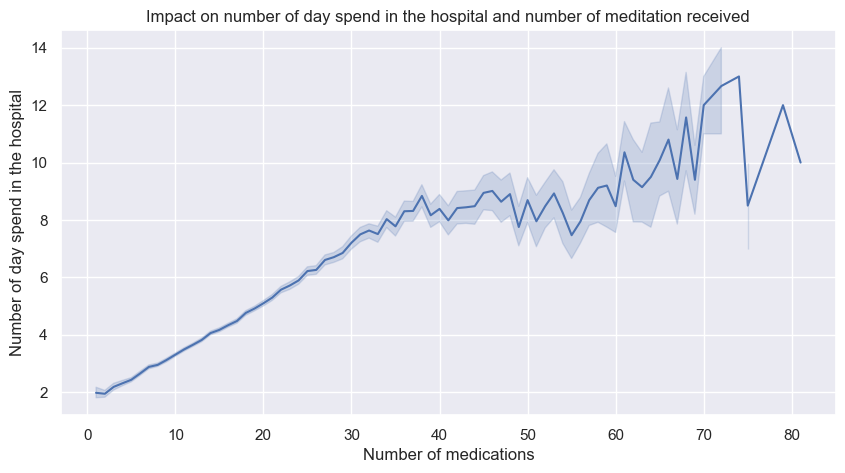

In [62]:
sns.lineplot(x=data.num_medications,y=data.time_in_hospital)
plt.xlabel('Number of medications')
plt.ylabel('Number of day spend in the hospital')
plt.title('Impact on number of day spend in the hospital and number of meditation received')
plt.show()

We can conclude that the number of medications is scalling lineary with number of days but when number of days is above 8 we remarque that it start getting discorded and not follow the pattern but it still scalling not going down.

#### Encoding some data

In [63]:
#drop duplication
data.drop_duplicates(['patient_nbr'], keep = 'first', inplace = True)

In [64]:
data.loc[data.change == 'Ch','change'] = 1
data.loc[data.change == 'No','change'] = 0

In [65]:
data.loc[data.diabetesMed == 'Yes','diabetesMed'] = 1
data.loc[data.diabetesMed == 'No','diabetesMed'] = 0

# Feature Engineering

## Feature selection

C:\Users\Achraf\AppData\Local\Temp\ipykernel_860\2252758045.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),cbar=True,annot=True,cmap='Blues')


<AxesSubplot: >

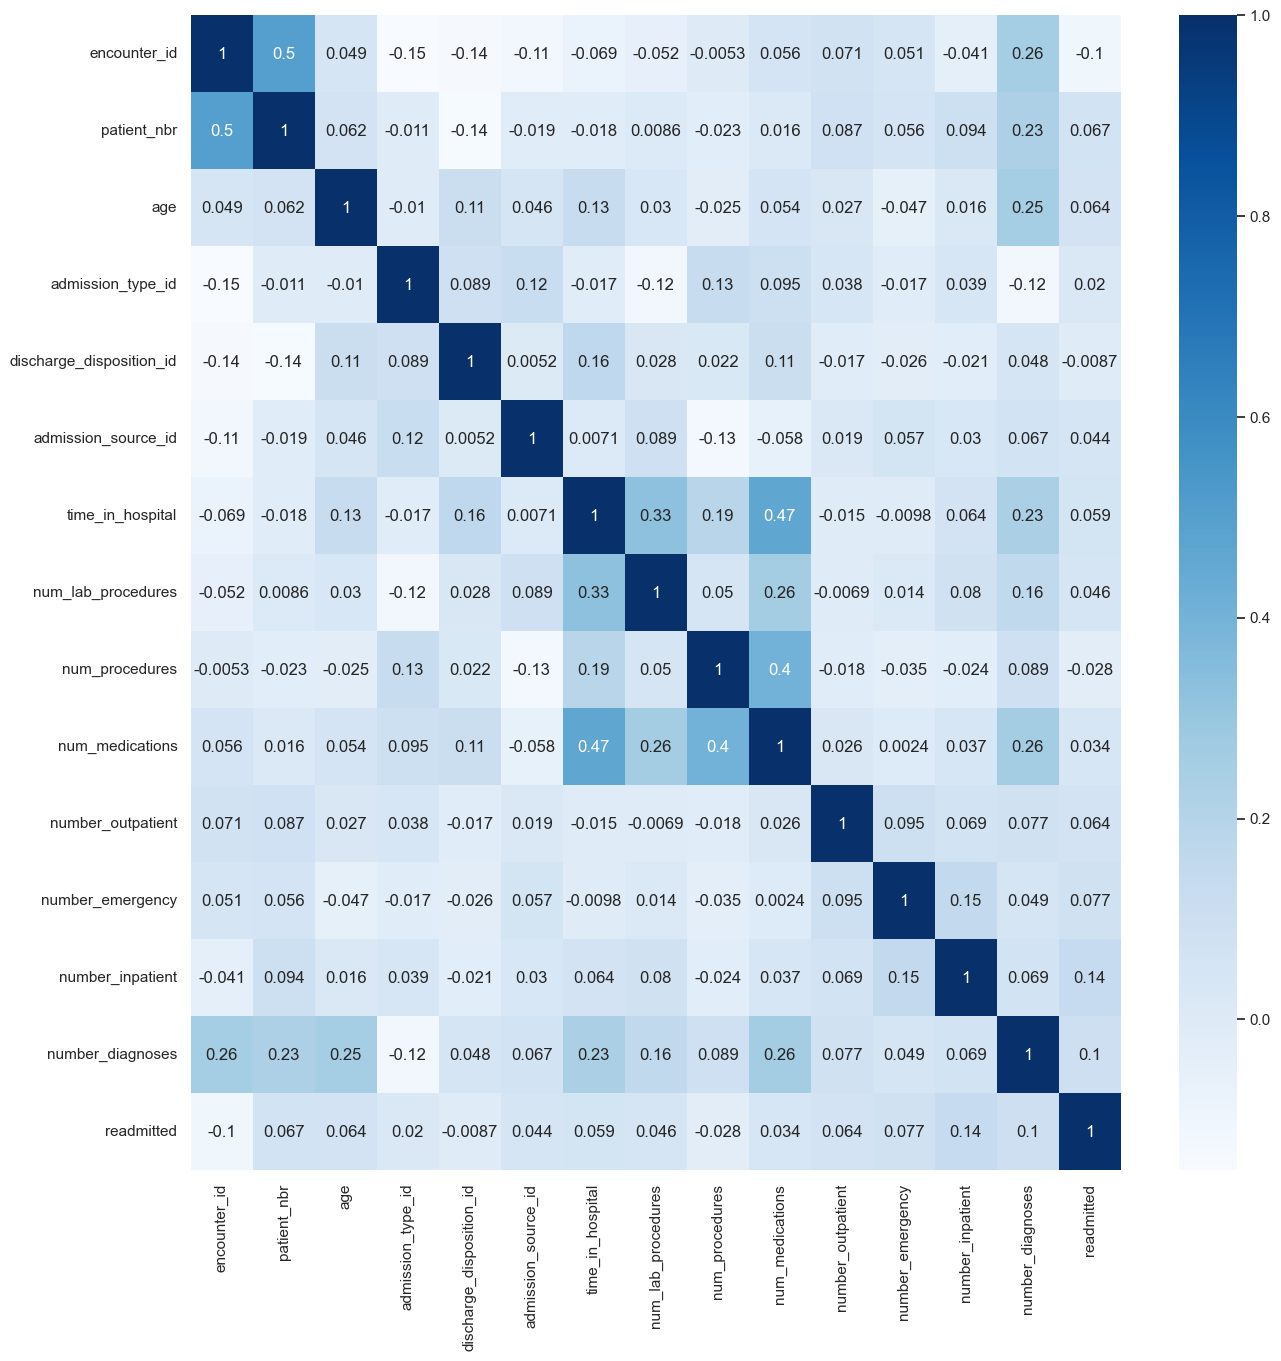

In [66]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),cbar=True,annot=True,cmap='Blues')

The relation between the independent feature and the dependent feature is less than 0.2 then I ll choose that independent feature for building a model.

#### Univariate selection of columns for our model

In [67]:
numeric_columns=['encounter_id', 'patient_nbr', 'age','admission_type_id', 'discharge_disposition_id', 'admission_source_id','time_in_hospital','num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient']

In [68]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [69]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
y=data['readmitted']
x=data[numeric_columns]
fit = bestfeatures.fit(x,y)

In [70]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns=['Specs','Score']
featureScores

,Specs,Score
0,encounter_id,4.817408e+10
1,patient_nbr,9.045261e+09
2,age,1.138852e+03
3,admission_type_id,3.166393e+01
4,discharge_disposition_id,4.225145e+01
5,admission_source_id,4.253538e+02
6,time_in_hospital,5.057346e+02
7,num_lab_procedures,1.391981e+03
8,num_procedures,1.214606e+02
9,num_medications,3.668037e+02


ALL columns have low values so they wont be eliminated

#### ExtraTreesClassifier method

In [71]:
from sklearn.ensemble import ExtraTreesClassifier

In [72]:
etc = ExtraTreesClassifier()
etc.fit(x,y)
etc.feature_importances_

array([0.15845231, 0.15718304, 0.07416126, 0.03641085, 0.06070059,
       0.03176119, 0.08672854, 0.12939386, 0.06101535, 0.12322565,
       0.0321654 , 0.02010226, 0.0286997 ])

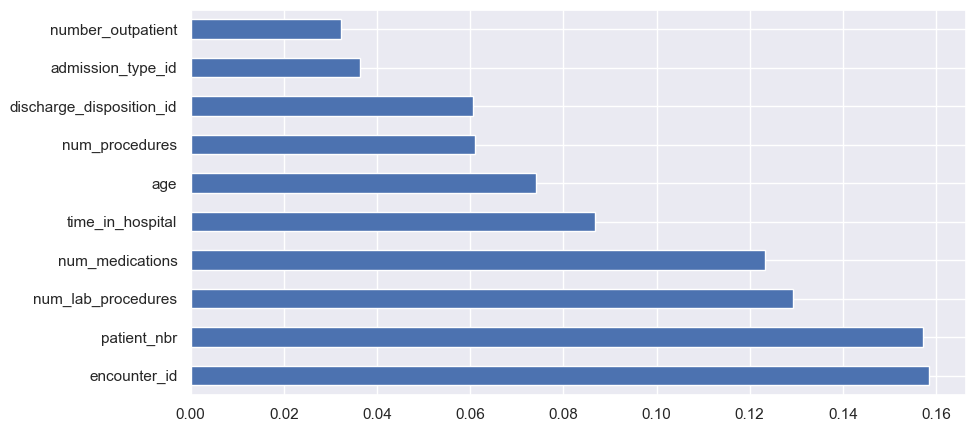

In [73]:
feat_importances = pd.Series(etc.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

the higher the score more important or relevant to the feature towards your output variable.

## Handling imbalanced data

In [74]:
data.readmitted.value_counts()

0    42982
1    28533
Name: readmitted, dtype: int64

In [75]:
#We can see that we have imbalance data

In [76]:
from imblearn.over_sampling import SMOTE
smot = SMOTE(sampling_strategy = 'minority')
X_smot, y_smot = smot.fit_resample(x,y)

In [77]:
data = data.drop(dropColumnsML,axis=1)
data.columns

Index(['encounter_id', 'patient_nbr', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

we need to encode those columns ['max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
   'metformin-pioglitazone', 'change', 'diabetesMed']

In [84]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
columnsIter=['max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
   'metformin-pioglitazone', 'change', 'diabetesMed']

In [86]:
for i in columnsIter:
    data[i]=LE.fit_transform(data[i])
    print(i)
    print(data[i].unique())

max_glu_serum
[2 1 3 0]
A1Cresult
[2 0 1 3]
metformin
[1 2 3 0]
repaglinide
[1 3 2 0]
nateglinide
[1 2 0 3]
chlorpropamide
[1 2 0 3]
glimepiride
[1 2 0 3]
acetohexamide
[0 1]
glipizide
[1 2 3 0]
glyburide
[1 2 3 0]
tolbutamide
[0 1]
pioglitazone
[1 2 3 0]
rosiglitazone
[1 2 3 0]
acarbose
[0 1 2]
miglitol
[1 2 0 3]
troglitazone
[0 1]
tolazamide
[0 1]
examide
[0]
citoglipton
[0]
insulin
[1 3 2 0]
glyburide-metformin
[1 2 0 3]
glipizide-metformin
[0 1]
glimepiride-pioglitazone
[0]
metformin-rosiglitazone
[0 1]
metformin-pioglitazone
[0 1]
change
[0 1]
diabetesMed
[0 1]


# Building Machine Learning Model

#### We have too many features and our target value is binary which mean SVC is a good choice as a model

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [91]:
col=['max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
   'metformin-pioglitazone', 'change', 'diabetesMed','encounter_id', 'patient_nbr', 'age','admission_type_id', 'discharge_disposition_id', 'admission_source_id','time_in_hospital','num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient']

In [92]:
X=data[col]
y=data['readmitted']

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [94]:
# Train a SVC model on the training data
svc = SVC()
svc.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_pred = svc.predict(X_test)

# Evaluate the performance of the model
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

Accuracy: 0.61910088792561


Tweaking the model by editing the hyperparameters

In [95]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.601 total time=13.9min
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.601 total time=15.2min
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.601 total time=14.1min
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.601 total time=13.9min
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.601 total time=13.7min
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.601 total time=13.8min
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.601 total time=13.8min
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.601 total time=13.8min
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.601 total time=13.8min
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.601 total time=13.7min
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.601 total time=13.7min
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [98]:
from sklearn.metrics import classification_report

In [99]:
grid_predictions = grid.predict(X_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75      8580
           1       0.00      0.00      0.00      5723

    accuracy                           0.60     14303
   macro avg       0.30      0.50      0.37     14303
weighted avg       0.36      0.60      0.45     14303



C:\Users\Achraf\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Achraf\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Achraf\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
